In [1]:
!python -m ipykernel install --user
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy
import cdb_extras.xarray_support as cdbxr
from pyCDB import client
from scipy.signal import find_peaks

from elm_detection import *

cdb = client.CDBClient()

Installed kernelspec python3 in /compass/home/parr/.local/share/jupyter/kernels/python3


## Helper functions

## Loading functions

## Processing functions

## Plotting functions

# Example of the workflow

## Free parameters

In [2]:

record_number = 18234
variant = "HIRES_ELM"
# This should be self explanatory /TODO
width=15
distance=5
rel_height=1

gradient_threshold=-100
energy_drop_threshold = 0.01


## Workflow

In [37]:
signal = load_cdb_energy_signal(record_number, variant=variant)
t_elms = load_cdb_telm_precalc(record_number)

In [38]:
peaks, peaks_up, peaks_down = find_peaks_in_signal(signal, width=width, distance=distance, rel_height=rel_height)
peaks_ds = peaks_as_xarray(peaks, signal)
filtered_peaks_ds = filter_peaks(peaks_ds, gradient_threshold=gradient_threshold, energy_drop_threshold=energy_drop_threshold)
filtered_peaks_ds

<xarray.Dataset>
Dimensions:               (peak_idx: 83)
Dimensions without coordinates: peak_idx
Data variables:
    t_start               (peak_idx) float64 1.017e+03 1.051e+03 ... 1.278e+03
    t_end                 (peak_idx) float64 1.017e+03 1.051e+03 ... 1.279e+03
    W_start               (peak_idx) float64 2.806e+03 3.808e+03 ... 3.875e+03
    W_end                 (peak_idx) float64 2.774e+03 3.74e+03 ... 3.791e+03
    gradient              (peak_idx) float64 -105.0 -194.5 ... -100.5 -119.8
    relative_energy_drop  (peak_idx) float64 0.03098 0.06477 ... 0.1851 0.06559

# Plotting

<IPython.core.display.Javascript object>


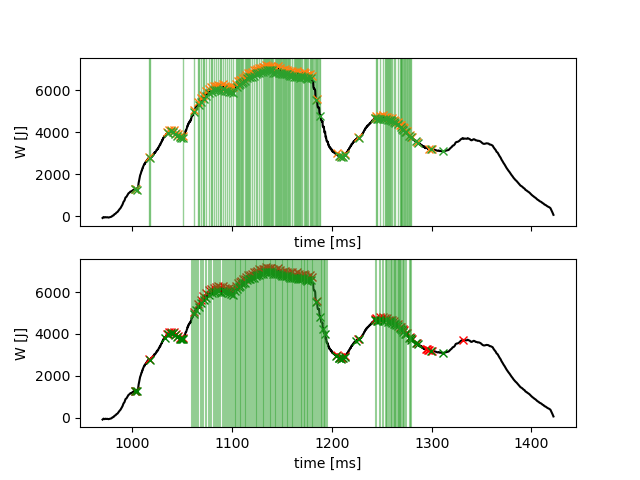

In [39]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

signal.plot(ax=axs[0], color='k')
signal.plot(ax=axs[1], color='k')

axs[0].plot(peaks_ds['t_start'], peaks_ds['W_start'], 'x', color='C1')
axs[0].plot(peaks_ds['t_end'], peaks_ds['W_end'], 'x', color='C2')

axs[1].plot(signal.isel(time=peaks_up).time, signal.isel(time=peaks_up), "x", color="red")
axs[1].plot(signal.isel(time=peaks_down).time, signal.isel(time=peaks_down), "x", color="green")

plot_peaks(filtered_peaks_ds, axs[0])
plot_telms(t_elms, axs[1])


In [6]:
signal = load_cdb_energy_signal(18234)
signal

<xarray.DataArray 'W' (time: 6135)>
array([-77.24702079, -33.12545768, -57.98293899, ..., 291.76782235,
       183.68966592,  70.98109631])
Coordinates:
  * time     (time) float64 970.0 971.0 972.0 ... 1.42e+03 1.421e+03 1.422e+03
Attributes:
    record_number:  18234
    revision:       1
    variant:        HIRES_ELM
    timestamp:      2019-04-25 18:16:39
    data_quality:   UNKNOWN
    units:          J
    description:    plasma thermal energy: 3/2*integral(p) dV

In [7]:
peaks, _, _ = find_peaks_in_signal(signal)
peaks

[(62, 71),
 (83, 92),
 (349, 355),
 (713, 720),
 (753, 779),
 (789, 821),
 (834, 868),
 (877, 908),
 (923, 958),
 (971, 990),
 (1026, 1033),
 (1244, 1249),
 (1331, 1335),
 (1381, 1387),
 (1434, 1442),
 (1489, 1495),
 (1543, 1553),
 (1592, 1600),
 (1642, 1649),
 (1685, 1691),
 (1729, 1735),
 (1774, 1781),
 (1827, 1834),
 (1864, 1871),
 (1901, 1907),
 (1941, 1952),
 (1981, 1987),
 (2024, 2031),
 (2090, 2097),
 (2129, 2137),
 (2164, 2171),
 (2193, 2198),
 (2229, 2235),
 (2262, 2268),
 (2297, 2304),
 (2332, 2339),
 (2367, 2373),
 (2400, 2409),
 (2442, 2450),
 (2480, 2487),
 (2511, 2516),
 (2550, 2557),
 (2589, 2595),
 (2621, 2628),
 (2654, 2660),
 (2697, 2703),
 (2732, 2739),
 (2763, 2770),
 (2794, 2802),
 (2830, 2838),
 (2867, 2875),
 (2898, 2905),
 (2938, 2947),
 (2975, 2982),
 (3006, 3012),
 (3037, 3043),
 (3075, 3083),
 (3108, 3113),
 (3136, 3143),
 (3164, 3173),
 (3204, 3213),
 (3240, 3246),
 (3274, 3281),
 (3316, 3327),
 (3352, 3361),
 (3383, 3390),
 (3409, 3415),
 (3447, 3455),
 (34

In [8]:
peaks

[(62, 71),
 (83, 92),
 (349, 355),
 (713, 720),
 (753, 779),
 (789, 821),
 (834, 868),
 (877, 908),
 (923, 958),
 (971, 990),
 (1026, 1033),
 (1244, 1249),
 (1331, 1335),
 (1381, 1387),
 (1434, 1442),
 (1489, 1495),
 (1543, 1553),
 (1592, 1600),
 (1642, 1649),
 (1685, 1691),
 (1729, 1735),
 (1774, 1781),
 (1827, 1834),
 (1864, 1871),
 (1901, 1907),
 (1941, 1952),
 (1981, 1987),
 (2024, 2031),
 (2090, 2097),
 (2129, 2137),
 (2164, 2171),
 (2193, 2198),
 (2229, 2235),
 (2262, 2268),
 (2297, 2304),
 (2332, 2339),
 (2367, 2373),
 (2400, 2409),
 (2442, 2450),
 (2480, 2487),
 (2511, 2516),
 (2550, 2557),
 (2589, 2595),
 (2621, 2628),
 (2654, 2660),
 (2697, 2703),
 (2732, 2739),
 (2763, 2770),
 (2794, 2802),
 (2830, 2838),
 (2867, 2875),
 (2898, 2905),
 (2938, 2947),
 (2975, 2982),
 (3006, 3012),
 (3037, 3043),
 (3075, 3083),
 (3108, 3113),
 (3136, 3143),
 (3164, 3173),
 (3204, 3213),
 (3240, 3246),
 (3274, 3281),
 (3316, 3327),
 (3352, 3361),
 (3383, 3390),
 (3409, 3415),
 (3447, 3455),
 (34

In [47]:
peaks_ds = peaks_as_xarray(peaks, signal)
peaks_ds

<xarray.Dataset>
Dimensions:  (peak_idx: 103)
Dimensions without coordinates: peak_idx
Data variables:
    t_start  (peak_idx) float64 1.003e+03 1.004e+03 ... 1.298e+03 1.3e+03
    t_end    (peak_idx) float64 1.003e+03 1.004e+03 ... 1.299e+03 1.311e+03
    W_start  (peak_idx) float64 1.295e+03 1.295e+03 ... 3.232e+03 3.21e+03
    W_end    (peak_idx) float64 1.279e+03 1.278e+03 ... 3.185e+03 3.103e+03

In [49]:
peaks_ds = filter_peaks(peaks_ds)
peaks_ds

<xarray.Dataset>
Dimensions:               (peak_idx: 83)
Dimensions without coordinates: peak_idx
Data variables:
    t_start               (peak_idx) float64 1.017e+03 1.051e+03 ... 1.278e+03
    t_end                 (peak_idx) float64 1.017e+03 1.051e+03 ... 1.279e+03
    W_start               (peak_idx) float64 2.806e+03 3.808e+03 ... 3.875e+03
    W_end                 (peak_idx) float64 2.774e+03 3.74e+03 ... 3.791e+03
    gradient              (peak_idx) float64 -105.0 -194.5 ... -100.5 -119.8
    relative_energy_drop  (peak_idx) float64 0.03098 0.06477 ... 0.1851 0.06559

# Hic sun dracones (space for testing)

In [11]:
t_elms

<xarray.DataArray 't_ELM_start' (t_ELM_start: 94)>
array([1059.87, 1061.6 , 1063.58, 1065.93, 1068.44, 1071.1 , 1073.87,
       1076.57, 1079.04, 1081.53, 1083.7 , 1085.89, 1088.13, 1090.74,
       1092.66, 1094.5 , 1096.49, 1098.48, 1100.6 , 1102.3 , 1103.9 ,
       1105.83, 1107.63, 1109.06, 1110.88, 1112.52, 1114.23, 1115.98,
       1117.75, 1119.4 , 1121.5 , 1123.46, 1124.95, 1126.93, 1128.85,
       1130.49, 1132.11, 1134.27, 1136.08, 1137.59, 1139.11, 1140.9 ,
       1142.77, 1144.33, 1146.3 , 1148.17, 1149.71, 1151.24, 1153.16,
       1154.78, 1156.24, 1157.6 , 1159.63, 1161.39, 1163.13, 1165.2 ,
       1167.05, 1168.56, 1169.89, 1171.77, 1173.35, 1174.87, 1176.17,
       1178.01, 1179.59, 1181.13, 1183.15, 1185.13, 1187.1 , 1188.75,
       1190.45, 1191.86, 1193.11, 1194.94, 1244.43, 1248.24, 1251.09,
       1253.77, 1255.44, 1257.59, 1258.77, 1260.08, 1261.73, 1263.28,
       1264.13, 1265.78, 1266.94, 1268.53, 1269.53, 1271.02, 1272.58,
       1273.86, 1278.2 , 1279.3 ])
Coordinates:
  * t_ELM_start  (t_ELM_start) float64 1.06e+03 1.062e+03 ... 1.279e+03
Attributes:
    record_number:  18234
    revision:       1
    timestamp:      2019-03-06 14:14:13
    data_quality:   UNKNOWN
    units:          ms
    description:    Array of length N: Start times of N detected ELMs.

In [12]:
width = 15
distance = 5
rel_height = 1

# 
peaks, _ = find_peaks(signal, width=width, distance=distance, rel_height=rel_height) 


In [13]:

import altair as alt
import elm_detection as elmd
import pandas as pd
test_results = elmd.detect_events(peaks_ds["t_start"], t_elms, 0.1)
test_results_df = pd.DataFrame(test_results)
test_results_df

,index,event_time,flag
0,1016.90,1016.90,False Positive
1,1050.75,1050.75,False Positive
2,1059.87,1059.87,False Negative
3,1061.65,1061.65,True Positive
4,1063.58,1063.58,False Negative
...,...,...,...
93,1272.60,1272.60,True Positive
94,1273.90,1273.90,True Positive
95,1275.25,1275.25,False Positive
96,1278.15,1278.15,True Positive


In [14]:
test_results_df[test_results_df["flag"] == "True Positive"]

,index,event_time,flag
3,1061.65,1061.65,True Positive
5,1066.00,1066.00,True Positive
6,1068.50,1068.50,True Positive
7,1071.15,1071.15,True Positive
8,1073.90,1073.90,True Positive
...,...,...,...
91,1269.55,1269.55,True Positive
92,1271.00,1271.00,True Positive
93,1272.60,1272.60,True Positive
94,1273.90,1273.90,True Positive


In [15]:
peaks_ds.to_dataframe()

,t_start,t_end,W_start,W_end,gradient,relative_energy_drop
peak_idx,,,,,,
0,1016.90,1017.20,2805.555763,2774.049922,-105.019469,0.030978
1,1050.75,1051.10,3807.689533,3739.619581,-194.485576,0.064771
2,1061.65,1061.90,5062.819501,4965.432765,-389.546941,0.091721
3,1066.00,1066.20,5425.198076,5305.950032,-596.240217,0.111854
4,1068.50,1068.80,5636.041097,5469.535888,-555.017365,0.155809
...,...,...,...,...,...,...
78,1271.00,1271.55,4241.646500,4115.614468,-229.149149,0.099138
79,1272.60,1273.25,4190.890880,4005.994211,-284.456414,0.145253
80,1273.90,1274.20,4064.182460,4002.306925,-206.251783,0.048566


In [16]:
from scipy.io import loadmat

In [17]:
pwd

'/compass/home/parr/Downloads/elm_detections_3'

In [18]:
mat = loadmat("/compass/home/parr/Downloads/103372_for_elm_detection_JET.mat", squeeze_me=True)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Aug 29 13:52:58 2023',
 '__version__': '1.0',
 '__globals__': [],
 'o': array((103372, array([49.35760117, 49.39060211, 49.43390274, 49.44150162, 49.48300171,
        49.52130127, 49.53150177, 49.55599976, 49.5890007 , 49.6147995 ,
        49.6998024 , 49.72090149, 49.73670197, 49.75850296, 49.79210281,
        49.82120132, 49.85359955, 49.98960114, 50.03540039, 50.08449936,
        50.1760025 , 50.24000168, 50.26539993, 50.27519989, 50.28630066,
        50.32590103, 50.33660126, 50.36109924, 50.39150238, 50.40250015,
        50.41270065, 50.42410278, 50.43490219, 50.46520233, 50.47510147,
        50.49309921, 50.51520157, 50.52330017, 50.53940201, 50.57380295,
        50.58010101, 50.6114006 , 50.62120056, 50.63870239, 50.64680099,
        50.6733017 , 50.69219971, 50.69950104, 50.71770096, 50.74380112,
        50.75550079, 50.76370239, 50.7867012 , 50.79410172, 50.81230164,
        50.83750153, 50.84560013, 50.8

In [19]:
time = mat["o"]["Wmhd_t"]
signal = mat["o"]["Wmhd"]

print(np.shape(time.item()), np.shape(signal.item()))

(38393,) (38393,)


In [31]:


w_jet , t_elms_jet = load_michals_matfile_as_da("/compass/home/parr/Downloads/103372_for_elm_detection_JET.mat")
w_jet

<xarray.DataArray (time: 38393)>
array([591633.06, 601905.94, 597702.2 , ..., 391072.3 , 396153.75,
       394362.6 ], dtype=float32)
Coordinates:
  * time     (time) float32 46.0 46.01 46.02 46.03 46.04 ... 64.0 64.0 64.0 64.0

<xarray.DataArray (elm_idx: 191)>
array([49.34960175, 49.38230133, 49.42570114, 49.43510056, 49.47489929,
       49.51330185, 49.52550125, 49.5483017 , 49.58200073, 49.60779953,
       49.69260025, 49.71380234, 49.7303009 , 49.75110245, 49.78499985,
       49.81520081, 49.84640121, 49.9822998 , 50.02820206, 50.07789993,
       50.16930008, 50.23180008, 50.25740051, 50.26800156, 50.27930069,
       50.31790161, 50.32929993, 50.35409927, 50.38399887, 50.39509964,
       50.40510178, 50.41650009, 50.42689896, 50.45690155, 50.46749878,
       50.48480225, 50.50709915, 50.51530075, 50.53139877, 50.56480026,
       50.57390213, 50.60290146, 50.61320114, 50.62979889, 50.63990021,
       50.66429901, 50.68370056, 50.69229889, 50.70890045, 50.73469925,
       50.74819946, 50.7560997 , 50.77759933, 50.78680038, 50.80350113,
       50.82860184, 50.83769989, 50.85840225, 50.87319946, 50.90010071,
       50.9314003 , 50.94110107, 50.94729996, 50.96260071, 50.97190094,
       50.9803009 , 50.98720169, 50.99980164, 51.00749969, 51.04920197,
       51.08499908, 51.09519958, 51.17070007, 51.25379944, 51.2961998 ,
       51.30960083, 51.32030106, 51.34300232, 51.36310196, 51.39099884,
       51.42689896, 51.45960236, 51.49320221, 51.50500107, 51.55220032,
       51.5646019 , 51.5746994 , 51.65570068, 51.66849899, 51.68700027,
       51.69430161, 51.71020126, 51.72090149, 51.7602005 , 51.78950119,
       51.8166008 , 51.84300232, 51.88339996, 51.92230225, 51.98180008,
       52.01739883, 52.05929947, 52.07229996, 52.13619995, 52.14820099,
       52.19520187, 52.24499893, 52.25540161, 52.26380157, 52.31790161,
       52.37929916, 52.38740158, 52.4048996 , 52.43579865, 52.44280243,
       52.457901  , 52.50510025, 52.52460098, 52.542202  , 52.55310059,
       52.58119965, 52.59090042, 52.61510086, 52.62310028, 52.6473999 ,
       52.66270065, 52.68920135, 52.7132988 , 52.76980209, 52.80130005,
       52.83959961, 52.85660172, 52.87929916, 52.88759995, 52.90909958,
       52.9720993 , 52.98360062, 53.0033989 , 53.01210022, 53.05760193,
       53.10990143, 53.25300217, 53.35079956, 53.47700119, 53.51250076,
       53.53540039, 53.71969986, 53.77429962, 53.86899948, 53.94449997,
       54.01760101, 54.15589905, 54.19300079, 54.23509979, 54.25880051,
       54.36000061, 54.38249969, 54.52569962, 54.74409866, 54.79230118,
       54.88560104, 55.00569916, 55.20780182, 55.25350189, 55.45009995,
       55.47869873, 55.56710052, 55.67650223, 55.68840027, 55.69879913,
       55.71590042, 55.76039886, 55.78300095, 55.82760239, 55.89509964,
       55.93579865, 56.00270081, 56.01520157, 56.03940201, 56.05170059,
       56.10440063, 56.12139893, 56.13280106, 56.17449951, 56.19150162,
       56.20859909, 56.22660065, 56.24520111, 56.26269913, 56.33320236,
       56.40520096])
Dimensions without coordinates: elm_idx

<IPython.core.display.Javascript object>


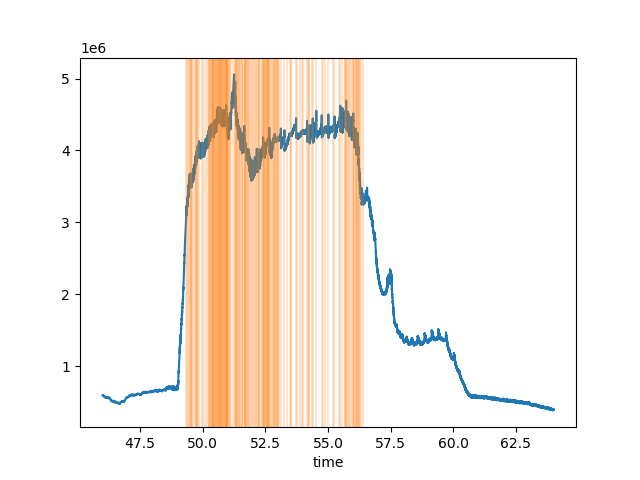

In [41]:
plt.figure()
w_jet.plot()
for t_elm in t_elms_jet:
    plt.axvline(t_elm, color="C1", alpha=0.2)
    

In [21]:


mat["o"].dtype.names

('shot_no', 't_elm_stop', 't_elm_start', 't_elm_peak', 'Wmhd', 'Wmhd_t')

In [ ]:
mat.keys()